In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Importing the dataset
# Importing the dataset
df = pd.read_csv('invest_prep_logist.csv', sep=';')
df.head(20)

,country,is_urban,age,female,married,religion,can_calc_percents,employment_type_last_year,income_government_last_year,income_own_business_last_year,...,active_bank_user,cash_property_savings,has_insurance,can_call,can_make_transaction,phone_ownership,num_financial_activities_last_year,literacy,has_investment,formal_savings (Y)
0,0,0,57,1,1,1,1,0,1,0,...,0,0,0,1,1,2,0,1,0,0
1,1,0,40,0,1,2,0,0,0,0,...,0,0,0,0,0,2,0,1,0,1
2,2,0,35,1,1,0,0,1,0,0,...,0,1,0,1,0,2,2,0,0,0
3,2,1,19,1,0,0,0,0,0,0,...,0,0,0,1,0,1,0,1,0,0
4,3,0,61,1,1,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
5,3,1,16,1,0,0,0,1,1,0,...,0,0,0,1,1,1,0,1,0,0
6,0,0,40,0,1,0,0,2,0,0,...,0,1,0,0,0,0,0,0,1,0
7,1,0,27,1,1,2,0,1,0,0,...,0,0,0,0,0,0,1,0,0,1
8,3,1,35,0,1,0,1,0,0,0,...,1,1,0,1,1,2,2,1,1,1
9,4,0,72,1,0,1,0,2,0,0,...,0,0,0,0,0,2,4,0,0,1


In [3]:
# Removing Correlated Data
dfr = df.drop(['can_make_transaction','has_investment'], axis='columns', inplace=False)
df = dfr
df.shape

(8400, 19)

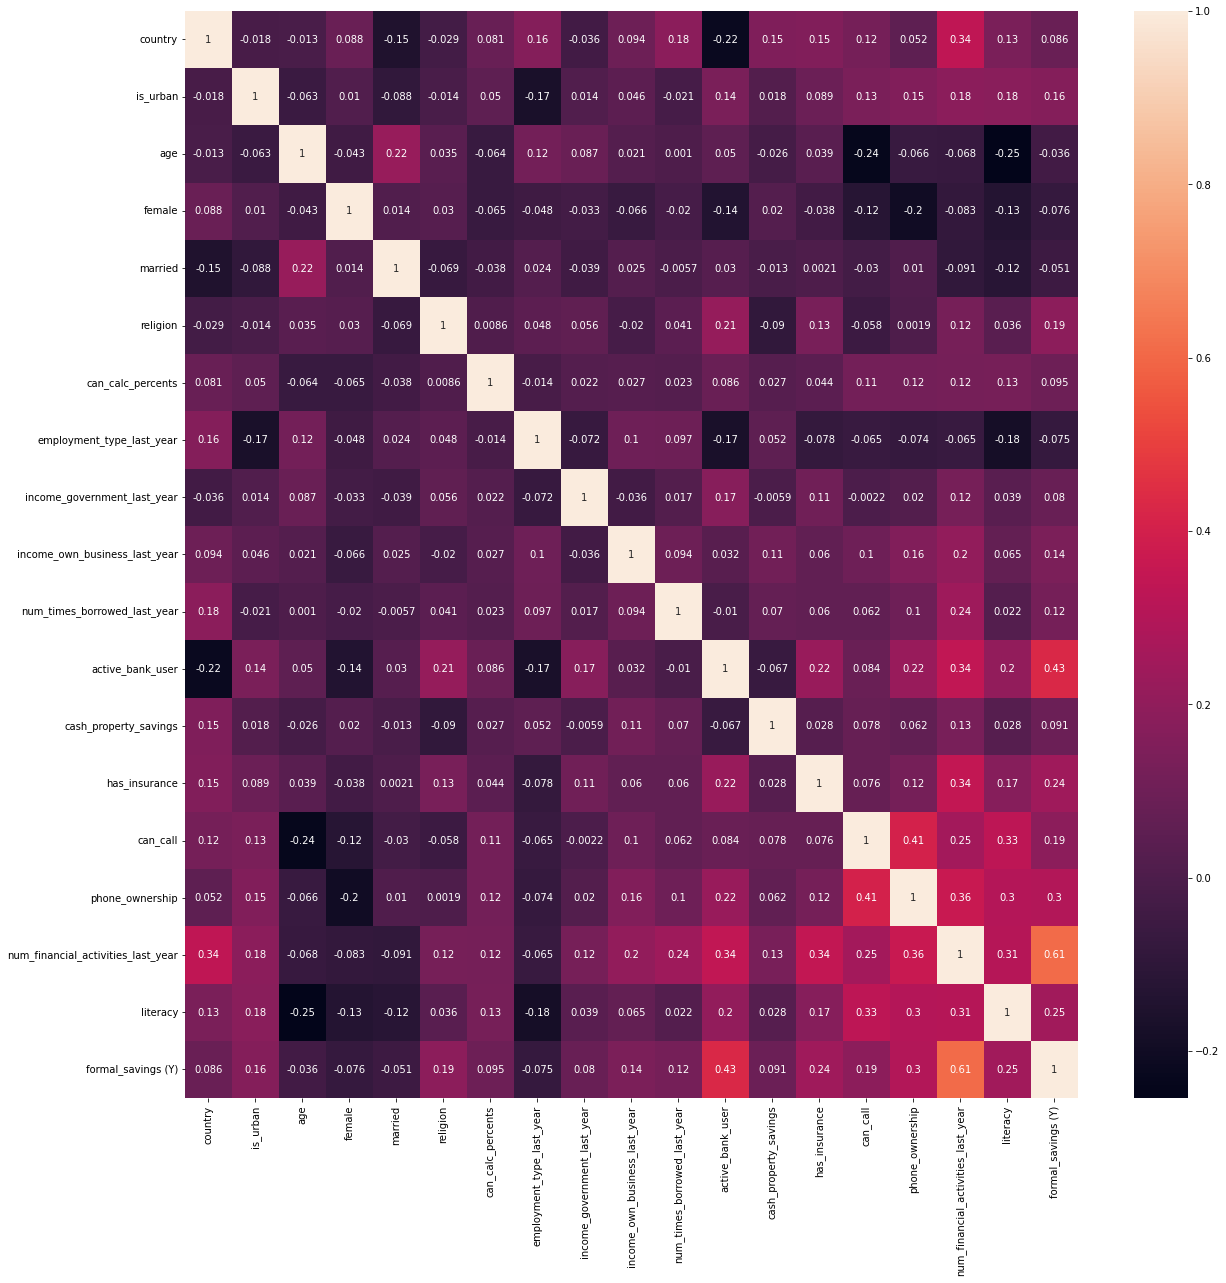

In [4]:
# Cheking correlations
import seaborn as sns
corrmat = df.corr()
f, ax = plt.subplots(figsize=(20, 20))
sns.heatmap(corrmat, annot=True)
plt.show()

# SPLITTING

In [5]:
col = ['country', 'is_urban', 'age', 'religion', 'employment_type_last_year', 'income_government_last_year','active_bank_user', 'cash_property_savings', 'has_insurance', 'can_call', 'phone_ownership', 'num_financial_activities_last_year','literacy','formal_savings (Y)']
from sklearn.model_selection import train_test_split
X = df[col]
train, test = train_test_split(X, test_size =0.2, random_state = 10)

В модель добавлены те 13 переменных, которые были выявлены значимыми в моделе Логистической регрессии.

<AxesSubplot:title={'center':'Savings'}>

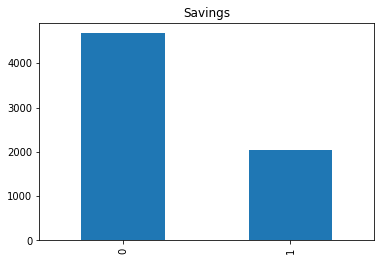

In [6]:
train['formal_savings (Y)'].value_counts().plot(kind='bar',title = 'Savings')

Таким образом, мы видим, что выборка не является сбалансированной (число бедных в тре раза больше числа богатых). Поэтому следует применить методы балансировки и посмотреть на полученный результат, сравнив его с изначальным в базовой моделе Логистической регрессии.

In [7]:
train

,country,is_urban,age,religion,employment_type_last_year,income_government_last_year,active_bank_user,cash_property_savings,has_insurance,can_call,phone_ownership,num_financial_activities_last_year,literacy,formal_savings (Y)
1991,6,1,49,0,4,0,0,1,0,1,1,0,1,0
2253,4,0,22,1,2,0,0,1,0,1,2,4,1,1
7513,6,0,38,1,4,0,0,1,0,1,2,0,0,0
6142,3,1,21,0,1,0,1,1,0,1,2,6,1,1
4084,0,0,30,0,3,0,0,1,0,1,2,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4829,2,0,30,0,4,0,0,1,0,1,1,0,0,0
7291,3,0,31,0,1,0,0,1,0,1,1,0,0,0
1344,3,1,24,0,3,0,0,0,0,1,2,1,1,0
7293,5,0,17,1,1,0,0,0,1,1,0,0,1,0


Следует отметить, что существует множество способов балансировки данных. Однако каждый из них имеет свои преимущества и недостатки. Например, метод <b>Random undersampling </b> удаляет примеры из класса большинства и может привести к потере бесценной для модели информации. Поэтому делаю вывод, что нецелесообразно терять данные, поскольку действительно потеря может привести к искажению результатов. Попробуем провести балансировку данных с помощью метода <b>Random oversampling </b> который дублирует примеры из класса меньшинства в наборе обучающих данных. Минусом есть то, что может привести к переобучению модели.

# RANDOM OVERSAMPLING

In [8]:
train['target'] = train ['formal_savings (Y)']
train.drop(['formal_savings (Y)'], axis = 'columns', inplace = True)

C:\Users\user\AppData\Local\Temp/ipykernel_6368/1746244192.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['target'] = train ['formal_savings (Y)']
D:\Python_Anaconda\envs\LAB\lib\site-packages\pandas\core\frame.py:4901: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [9]:
count_class_0, count_class_1 = train.target.value_counts()

class_0 = train[train['target'] == 0]
class_1 = train[train['target'] == 1]

Random over-sampling:
0    4676
1    4676
Name: target, dtype: int64


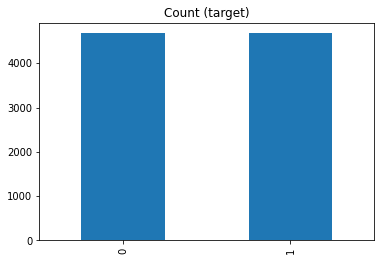

In [10]:
class_1_over = class_1.sample(count_class_0, replace = True)
test_over = pd.concat([class_0, class_1_over], axis = 0)

print('Random over-sampling:')
print(test_over.target.value_counts())

test_over.target.value_counts().plot(kind = 'bar', title ='Count (target)');

Число бедных и богатых выровнялось

Так же, как вариант сбалансирования данных - существует метод <b>Smote</b>. Он включает дублирование примеров в классе меньшинства, хотя эти примеры не добавляют в модель никакой новой информации. Вместо этого новые примеры могут быть синтезированы из существующих примеров. Это тип увеличения данных для класса меньшинства и называется техникой синтетической передискретизации меньшинства , или сокращенно SMOTE .

In [11]:
#! pip install imblearn

In [12]:
X_col = ['country', 'is_urban', 'age', 'religion', 'employment_type_last_year', 'income_government_last_year','active_bank_user', 'cash_property_savings', 'has_insurance', 'can_call', 'phone_ownership', 'num_financial_activities_last_year','literacy']


In [13]:
X = train[X_col]
y = train.target
y.value_counts()

0    4676
1    2044
Name: target, dtype: int64

In [14]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE ()
X_sm, y_sm = oversample.fit_resample (X, y)
print (y_sm.value_counts())

0    4676
1    4676
Name: target, dtype: int64


SAMPLES

In [15]:
X_train = train[X_col]
y_train = train.target
X_test = test[X_col]
test['target'] = test ['formal_savings (Y)']
test.drop(['formal_savings (Y)'], axis='columns', inplace = True)
y_test = test.target

# TREE

In [16]:
def max_leaf_nodes(X_train, X_test, y_train, y_test, n):
    mse_train = []
    mse_test = []
    for i in n:
        ct = DecisionTreeClassifier(max_leaf_nodes = i, random_state=10).fit(X_train, y_train)
        mse_train.append(mean_squared_error(y_train, ct.predict(X_train)))
        mse_test.append(mean_squared_error(y_test, ct.predict(X_test)))
    fig, ax = plt.subplots(figsize=(8, 4))
    ax.plot(n, mse_train, alpha=0.5, color='blue', label='train')
    ax.plot(n, mse_test, alpha=0.5, color='red', label='test')
    ax.set_ylabel("MSE")
    ax.set_xlabel("max_leaf_nodes")

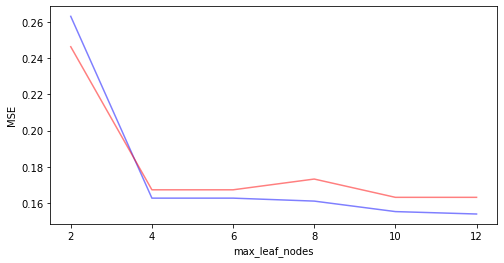

In [17]:
# The optimal number of max_leaf_nodes
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_squared_error
max_leaf_nodes(X_train, X_test, y_train, y_test, [2, 4, 6, 8, 10,12])

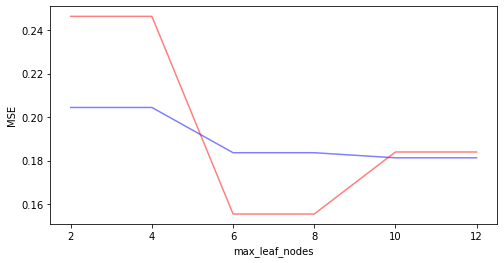

In [18]:
# The optimal number of max_leaf_nodes
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_squared_error
max_leaf_nodes(X_sm, X_test, y_sm, y_test, [2, 4, 6, 8, 10, 12])

# MODEL BASE

In [19]:

# Fitting Tree to the Training set
ct = DecisionTreeClassifier(max_leaf_nodes = 10, random_state = 10).fit(X_train, y_train)

# Predicting the Test set results
y_pred = ct.predict(X_test)

ct.score(X_train,y_train), ct.score(X_test,y_test)

(0.8447916666666667, 0.8369047619047619)

Проэкспериментировав с глубиной дерева, выбираем 10. Данные на тестовой и обучающей выборке сопоставимы.

In [20]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_train, ct.predict(X_train))
print(cm)

[[4247  429]
 [ 614 1430]]


In [21]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[1065  101]
 [ 173  341]]


# MODEL RESAMPLED

In [22]:

# Fitting Tree to the Training set
ct_r = DecisionTreeClassifier(max_leaf_nodes = 7, random_state = 10).fit(X_sm, y_sm)

# Predicting the Test set results
y_pred_r = ct_r.predict(X_test)

ct_r.score(X_sm,y_sm), ct_r.score(X_test,y_test)

(0.8164029084687767, 0.8446428571428571)

Снова-таки, проэкспериментировав с глубиной дерева, выбираем 7.Однако при всех экспериментах данные на обучающей выборке больше, за тестовую (о чем я упоминал в минусах модели Random Oversampling). Однако различие в данных не критично, точно утверждать, что модель переобучена не можем. 

In [23]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_sm, ct.predict(X_sm))
print(cm)

[[4247  429]
 [1606 3070]]


In [24]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_r)
print(cm)

[[994 172]
 [ 89 425]]


Таким образом, мы получили более сбалансированные данные. 
Построена таблица сопряженности на основе тестовой и обучающей выборки. 

Таким образом, 1419 примеров распознаны верно, неверно распознано 261. 
В базовой моделе логистической регрессии немного лучше результаты, однако данная балансировка помогает более здраво оценить ситуации и понять реальное положение финансового состояния людей.

Итак, 89 обьектов модель отнесла неверно к классу False и, соответсвенно, 172 обьектов не правильно отнесены к классу True.

Людей, которые действительно к концу года имеют сбережения, но модель их неправильно распознала - 89, а наоборот, у которых нет лишних средств, но отправились к классу состоятельных людей - таких 172.

Исходя из первоначальной задачи, где мы искали модель с лучшим качеством распознаваемости обьектов, я пересмотрел поставленную цель и понял, что целесообразно искать ту модель, которая будет лучшим образом выявлять бедных людей. Поскольку даннй индекс расчитан на то, чтобы помогать в борьбе с бедностью, голодом, различной социальной помощью - ориентир делается именно на этот класс. Поэтому в последующих моделях будет делаться акцент именно на верном распознавании бедности.
